# INF2179 Group 1 Final Project

## Group 1: Rod Mazloomi, Marcus Emmanuel Barnes


# Data Cleaning

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\barnes26\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\barnes26\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Load Data

In [2]:
FILENAME = "fake_job_postings.csv"
INDEX = "job_id"

df = pd.read_csv(FILENAME)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## Set Index

In [3]:
# Set index
df.set_index(INDEX, inplace=True)

# Clean Categorical Data

## Drop Columns

In [4]:
columns_to_drop = ["location", "department", "salary_range", "industry"]
df.drop(columns_to_drop, axis=1, inplace=True)

## Binary columns 

In [5]:
# Convert binary columns to boolean
bool_columns = ["telecommuting", "has_company_logo", "has_questions", "fraudulent"]
df[bool_columns] = df[bool_columns].astype("bool")

## Employment Type

In [6]:
FULL_TIME = "Full-time"
PART_TIME = "Part-time"
OTHER = "Other"

# Map employment type values
df["employment_type"] = df["employment_type"].map({
    "Full-time": FULL_TIME,
    "Part-time": PART_TIME,
    "Other": OTHER,
    "Contract": OTHER,
    "Temporary": OTHER,
})

## Required Experience

In [7]:
JUNIOR = "Junior"
STANDARD = "Standard"
SENIOR = "Senior"

# Map required experience values
df["required_experience"] = df["required_experience"].map({
    "Internship": JUNIOR,
    "Not Applicable": np.nan,
    "Mid-Senior level": STANDARD,
    "Associate": STANDARD,
    "Entry level": JUNIOR,
    "Executive": SENIOR,
    "Director": SENIOR
})

## Required education

In [8]:
HIGHSCHOOL = "Highschool"
UNDERGRADUATE = "Undergraduate"
POSTGRADUATE = "Postgraduate"
Other = "Other"

df["required_education"] = df["required_education"].map({
    "Bachelor's Degree": UNDERGRADUATE, 
    "Master's Degree": POSTGRADUATE,
    'High School or equivalent': HIGHSCHOOL, 
    'Unspecified': np.nan,
    'Some College Coursework Completed': HIGHSCHOOL, 
    'Vocational': OTHER, 
    'Certification': OTHER,
    'Associate Degree': UNDERGRADUATE, 
    'Professional': OTHER, 
    'Doctorate': POSTGRADUATE,
    'Some High School Coursework': HIGHSCHOOL, 
    'Vocational - Degree': OTHER,
    'Vocational - HS Diploma': OTHER
})

## Function

In [9]:
BUSINESS = "Business"
HEALTHCARE = "Healthcare"
INFORMATION_TECHNOLOGY = "Information Technology"
ENGINEERING = "Engineering"
DESIGN = "Design"
EDUCATION = "Education"
FINANCE = "Finance"
SCIENCE = "Science"
LEGAL = "Legal"
OTHER = "Other"

df["function"] = df["function"].map({
    'Marketing': BUSINESS, 
    'Customer Service': BUSINESS, 
    'Sales': BUSINESS,
    'Health Care Provider': HEALTHCARE, 
    'Management': BUSINESS, 
    'Information Technology': INFORMATION_TECHNOLOGY,
    'Other': OTHER, 
    'Engineering': ENGINEERING, 
    'Administrative': BUSINESS, 
    'Design': DESIGN, 
    'Production': BUSINESS,
    'Education': EDUCATION, 
    'Supply Chain': BUSINESS, 
    'Business Development': BUSINESS,
    'Product Management': BUSINESS, 
    'Financial Analyst': FINANCE, 
    'Consulting': BUSINESS,
    'Human Resources': BUSINESS, 
    'Project Management': BUSINESS, 
    'Manufacturing': BUSINESS,
    'Public Relations': BUSINESS, 
    'Strategy/Planning': BUSINESS, 
    'Advertising': BUSINESS, 
    'Finance': FINANCE,
    'General Business': BUSINESS, 
    'Research': OTHER, 
    'Accounting/Auditing': FINANCE,
    'Art/Creative': DESIGN, 
    'Quality Assurance': INFORMATION_TECHNOLOGY, 
    'Data Analyst': INFORMATION_TECHNOLOGY,
    'Business Analyst': BUSINESS, 
    'Writing/Editing': DESIGN, 
    'Distribution': BUSINESS, 
    'Science': SCIENCE,
    'Training': OTHER, 
    'Purchasing': BUSINESS, 
    'Legal': LEGAL
})

# Clean Text Data

## Merge text data into one feature

In [10]:
text_columns = ["title", "company_profile", "description", "requirements", "benefits"]
TEXT_COLUMN_NAME = "text"

df[TEXT_COLUMN_NAME] = df.loc[:, text_columns] \
    .fillna("") \
    .apply(lambda row: " ".join([row[col] for col in text_columns]), axis=1)

df.drop(text_columns, axis=1, inplace=True)
df.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent,text
job_id,,,,,,,,,
1,False,True,False,Other,Junior,NaN,Business,False,"Marketing Intern We're Food52, and we've creat..."
2,False,True,False,Full-time,NaN,NaN,Business,False,Customer Service - Cloud Video Production 90 S...
3,False,True,False,NaN,NaN,NaN,NaN,False,Commissioning Machinery Assistant (CMA) Valor ...
4,False,True,False,Full-time,Standard,Undergraduate,Business,False,Account Executive - Washington DC Our passion ...
5,False,True,True,Full-time,Standard,Undergraduate,Healthcare,False,Bill Review Manager SpotSource Solutions LLC i...


## Clean the text data

In [11]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    cleaned_words = []
    for word in text.split():
        word_lower = word.strip(" " + string.punctuation).lower()
        if word_lower in stop_words: continue
        word_lemmatized = lemmatizer.lemmatize(word_lower)
        cleaned_words.append(word_lemmatized)
    return " ".join(cleaned_words)

df["text"] = df["text"].apply(clean_text)

# Export Data

In [12]:
df.to_csv("cleaned_" + FILENAME)

# Data Prediction

## Import Libraries

In [13]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# pip install imblearn
from imblearn.combine import SMOTETomek

In [14]:
# Constants
FILENAME = "cleaned_fake_job_postings.csv"
INDEX = "job_id"
TARGET_VARIABLE = "fraudulent"
CATEGORICAL_COLUMNS = ["telecommuting", "has_company_logo", "has_questions", "employment_type", "required_experience", "required_education", "function", "fraudulent"]
CORPUS_COLUMN_NAME = "text"
TFIDF_MAX_FEATURES = 100
TFIDF_NGRAM_RANGE = (1,1)
RANDOM_STATE = 12345

## Load Data

In [15]:
df = pd.read_csv(FILENAME)
df.set_index(INDEX, inplace=True)
df.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent,text
job_id,,,,,,,,,
1,False,True,False,Other,Junior,NaN,Business,False,marketing intern we're food52 we've created gr...
2,False,True,False,Full-time,NaN,NaN,Business,False,customer service cloud video production 90 se...
3,False,True,False,NaN,NaN,NaN,NaN,False,commissioning machinery assistant cma valor se...
4,False,True,False,Full-time,Standard,Undergraduate,Business,False,account executive washington dc passion impro...
5,False,True,True,Full-time,Standard,Undergraduate,Healthcare,False,bill review manager spotsource solution llc gl...


## Encode Categorical Data

In [16]:
encoders = {}

for col in CATEGORICAL_COLUMNS:    
    le = preprocessing.LabelEncoder()
    df.loc[:, col] = le.fit_transform(df[col])
    encoders[col] = le

df.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent,text
job_id,,,,,,,,,
1,0,1,0,1,0,4,0,0,marketing intern we're food52 we've created gr...
2,0,1,0,0,3,4,0,0,customer service cloud video production 90 se...
3,0,1,0,3,3,4,10,0,commissioning machinery assistant cma valor se...
4,0,1,0,0,2,3,0,0,account executive washington dc passion impro...
5,0,1,1,0,2,3,5,0,bill review manager spotsource solution llc gl...


## Baseline Classifier

In [17]:
X = df.drop(TARGET_VARIABLE, axis=1)
y = df.loc[:, TARGET_VARIABLE]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=RANDOM_STATE)

bc = DummyClassifier(strategy="most_frequent")
bc.fit(X_train, y_train)
bc.score(X_test, y_test)

0.9516778523489933

## Random Forsest Classification

### TF-IDF Feature Extraction

In [18]:
X = df.drop(TARGET_VARIABLE, axis=1)
y = df.loc[:, TARGET_VARIABLE]

tf_idf = TfidfVectorizer(stop_words="english", ngram_range=TFIDF_NGRAM_RANGE, max_features=TFIDF_MAX_FEATURES)
tf_idf.fit(X[CORPUS_COLUMN_NAME])
tf_idf_feature_names = "tfidf_" + np.array(tf_idf.get_feature_names(), dtype=object)
tf_idf_features = pd.DataFrame(tf_idf.transform(X[CORPUS_COLUMN_NAME]).toarray(), columns=tf_idf_feature_names, index=X.index)
X = X.drop(CORPUS_COLUMN_NAME, axis=1).join(tf_idf_features)

### Random Forest Classification without Synthetic Minority Oversampling Technique (SMOTE)

In [19]:
skf = StratifiedKFold(n_splits=10, random_state=RANDOM_STATE, shuffle=True)
rfc = RandomForestClassifier(n_estimators=100, criterion="entropy")
scores = cross_val_score(rfc, X, y, scoring='accuracy', cv=skf, n_jobs=-1)
scores

array([0.96923937, 0.97595078, 0.97147651, 0.97706935, 0.97259508,
       0.97651007, 0.97035794, 0.96923937, 0.97371365, 0.97762864])

In [20]:
scores.mean()

0.9733780760626398

### Random Forest Classification with SMOTE

In [21]:
smt = SMOTETomek(random_state=RANDOM_STATE)
X_res, y_res = smt.fit_resample(X, y)

In [22]:
skf = StratifiedKFold(n_splits=10, random_state=RANDOM_STATE, shuffle=True)
rfc = RandomForestClassifier(n_estimators=100, criterion="entropy")
scores = cross_val_score(rfc, X_res, y_res, scoring='accuracy', cv=skf, n_jobs=-1)
scores

array([0.99529827, 0.99353512, 0.99353512, 0.9964737 , 0.99382897,
       0.99441669, 0.99706142, 0.99382897, 0.99323927, 0.99529688])

In [23]:
scores.mean()

0.9946514409684163

# Data Visualization

## Import Libraries

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#pip install wordcloud
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

## Load Data

In [26]:
df = pd.read_csv('./cleaned_fake_job_postings.csv')
df.set_index("job_id", inplace=True)
df.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent,text
job_id,,,,,,,,,
1,False,True,False,Other,Junior,NaN,Business,False,marketing intern we're food52 we've created gr...
2,False,True,False,Full-time,NaN,NaN,Business,False,customer service cloud video production 90 se...
3,False,True,False,NaN,NaN,NaN,NaN,False,commissioning machinery assistant cma valor se...
4,False,True,False,Full-time,Standard,Undergraduate,Business,False,account executive washington dc passion impro...
5,False,True,True,Full-time,Standard,Undergraduate,Healthcare,False,bill review manager spotsource solution llc gl...


In [27]:
def clean_label_name(text):
    return text.replace("_", " ").title()

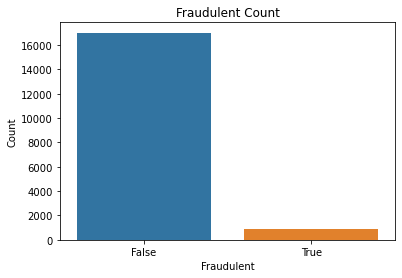

In [28]:
col = "fraudulent"
clean_label = clean_label_name(col)
ax = sns.countplot(x=col, data=df)
ax.set(xlabel=clean_label, ylabel='Count', title=f'{clean_label} Count')
plt.show()

([<matplotlib.patches.Wedge at 0x2384f90aa60>,
 [Text(-1.0872905906487755, 0.16673083544034975, 'Fake'),
  Text(1.0872905828435406, -0.16673088634009564, 'Real')])

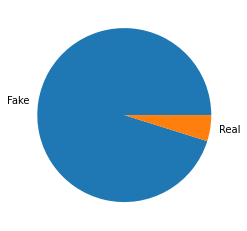

In [29]:
plt.pie(df["fraudulent"].value_counts(), labels=["Fake", "Real"])

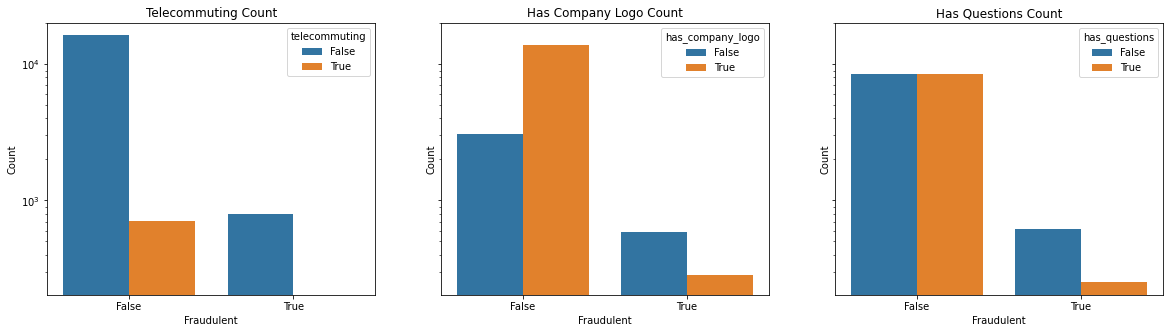

In [30]:
binary_columns = ["telecommuting", "has_company_logo", "has_questions"]
f, axes = plt.subplots(1, 3, sharey=True, figsize=(20, 5))
for i in range(len(binary_columns)):
    col = binary_columns[i]
    ax = axes[i]
    ax = sns.countplot(x="fraudulent", hue=col, data=df, ax=ax)
    ax.set(xlabel=clean_label_name("fraudulent"), ylabel='Count', title=f'{clean_label_name(col)} Count', yscale="log")
plt.show()

In [31]:
real_text = " ".join(df[df["fraudulent"] == 0].text)
fake_text = " ".join(df[df["fraudulent"] == 1].text)

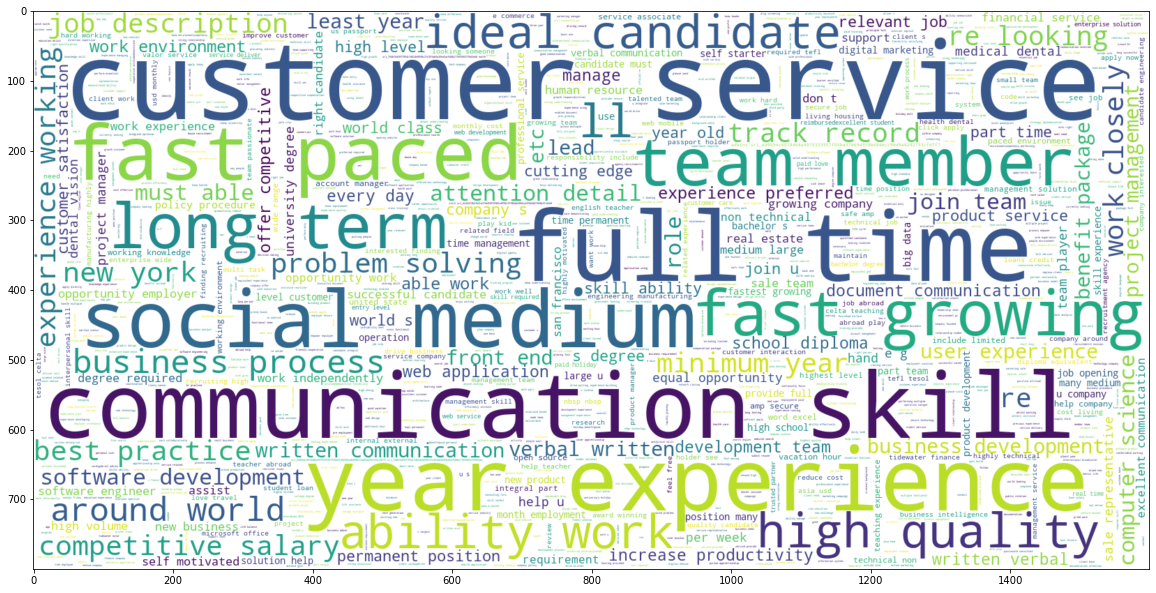

In [32]:
plt.figure(figsize = (20,20))

word_cloud = WordCloud(width = 1600 , height = 800 , max_words = 1000, background_color="white").generate(real_text)
plt.imshow(word_cloud, interpolation = 'bilinear')

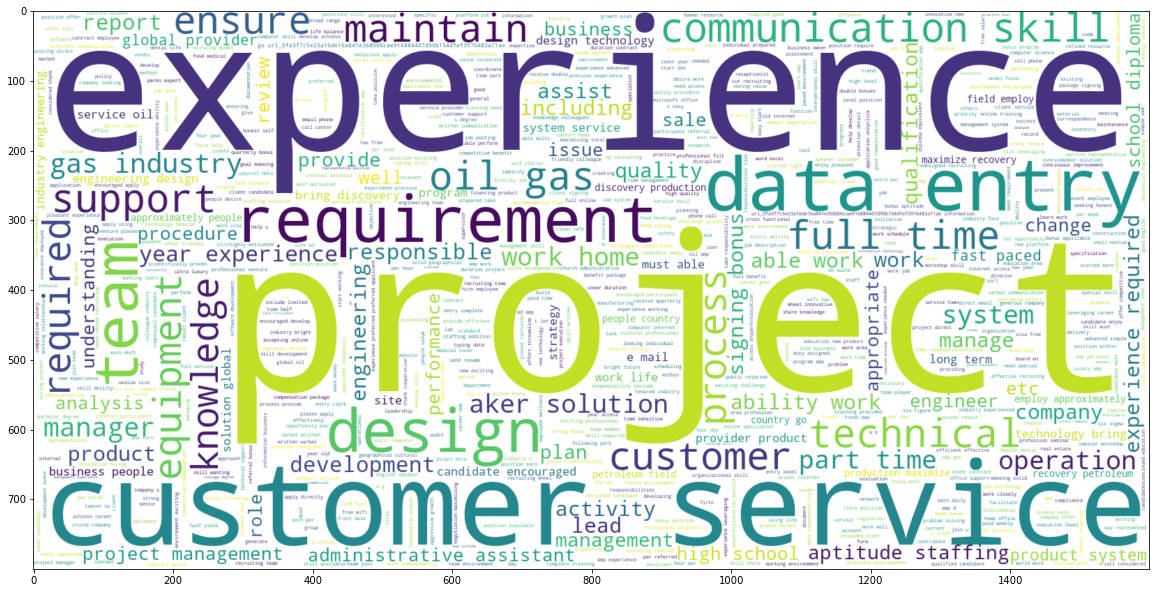

In [33]:
plt.figure(figsize = (20,20))

word_cloud = WordCloud(width = 1600 , height = 800 , max_words = 1000, background_color="white").generate(fake_text)
plt.imshow(word_cloud, interpolation = 'bilinear')

In [34]:
vectorizer = CountVectorizer(max_features=100)
X_real = vectorizer.fit_transform(df.loc[df["fraudulent"] == 0, "text"])
real_words_list = vectorizer.get_feature_names()
real_words_set = set(vectorizer.get_feature_names())
pd.DataFrame(X_real.toarray(), columns=real_words_list).sum(axis=0).sort_values(ascending=False).head(20)

experience     39463
team           37411
work           36770
company        28299
service        28154
customer       25894
business       23814
we             20505
client         19663
product        19147
new            17446
year           17100
management     16215
skill          16008
development    15945
sale           15656
time           15625
working        15584
amp            15459
job            14317
dtype: int64

In [35]:
vectorizer = CountVectorizer(max_features=100)
X_fake = vectorizer.fit_transform(df.loc[df["fraudulent"] == 1, "text"])
fake_words_list = vectorizer.get_feature_names()
fake_words_set = set(vectorizer.get_feature_names())
pd.DataFrame(X_fake.toarray(), columns=fake_words_list).sum(axis=0).sort_values(ascending=False).head(20)

work           1829
experience     1610
service        1287
amp            1154
skill          1112
customer       1046
company         963
team            943
product         904
time            865
position        856
project         821
business        773
management      730
system          707
ability         688
year            676
data            651
engineering     633
industry        612
dtype: int64

In [36]:
pd.DataFrame(real_words_set.difference(fake_words_set), columns=["Real words"])

,Real words
0,digital
1,growth
2,world
3,also
4,great
5,marketing
6,web
7,market
8,social
9,want


In [37]:
pd.DataFrame(fake_words_set.difference(real_words_set), columns=["Fake Words"])

,Fake Words
0,program
1,oil
2,per
3,responsibility
4,plan
5,responsible
6,engineer
7,control
8,contract
9,engineering
